# Clustering Analysis: 
Apply different clustering algorithms to Visualize and interpret the clusters

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("cleaned_data.csv")
print(df)


           Entity Code  Year  Schizophrenia  Depressive   Anxiety   Bipolar  \
0     Afghanistan  AFG  1990       0.223206    4.996118  4.713314  0.703023   
1     Afghanistan  AFG  1991       0.222454    4.989290  4.702100  0.702069   
2     Afghanistan  AFG  1992       0.221751    4.981346  4.683743  0.700792   
3     Afghanistan  AFG  1993       0.220987    4.976958  4.673549  0.700087   
4     Afghanistan  AFG  1994       0.220183    4.977782  4.670810  0.699898   
...           ...  ...   ...            ...         ...       ...       ...   
6188     Zimbabwe  ZWE  2015       0.201042    3.407624  3.184012  0.538596   
6189     Zimbabwe  ZWE  2016       0.201319    3.410755  3.187148  0.538593   
6190     Zimbabwe  ZWE  2017       0.201639    3.411965  3.188418  0.538589   
6191     Zimbabwe  ZWE  2018       0.201976    3.406929  3.172111  0.538585   
6192     Zimbabwe  ZWE  2019       0.202482    3.395476  3.137017  0.538580   

        Eating  
0     0.127700  
1     0.123256  


# Data Preparation
First, we'll prepare the data for clustering by normalizing it.

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select the features for clustering
features = ['Schizophrenia', 'Depressive', 'Anxiety', 'Bipolar', 'Eating']

# Normalize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Convert the normalized data back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=features)


# K-Means Clustering
K-Means clustering partitions the data into k clusters, where each data point belongs to the cluster with the nearest mean.

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_7324\3186337547.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['KMeans_Cluster'] = kmeans_labels


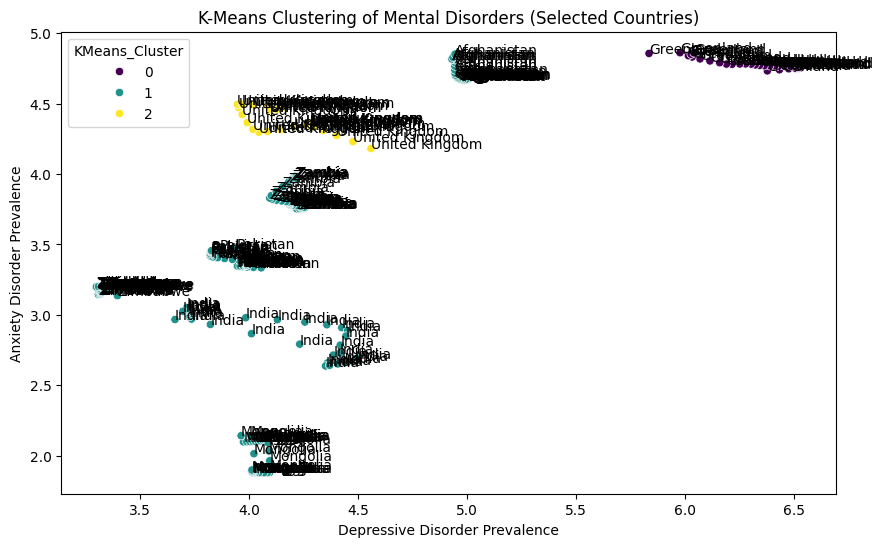

In [4]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df is the DataFrame containing the data
# and df_scaled is the DataFrame containing scaled features of the disorders

# Select 10 specific countries (adjust the list as needed)
selected_countries = ["Pakistan", "India", "Afghanistan", "Greenland", "Mongolia", "Zimbabwe", "Zambia", "United Kingdom"]
# Filter the DataFrame to include only the selected countries
df_selected = df[df["Entity"].isin(selected_countries)]
df_scaled_selected = df_scaled[df["Entity"].isin(selected_countries)]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled_selected)

# Add cluster labels to the DataFrame
df_selected['KMeans_Cluster'] = kmeans_labels

# Visualize the clusters
plt.figure(figsize=(12, 8))
palette = sns.color_palette("tab10", len(selected_countries))

# Scatter plot for each selected country with different colors
for i, country in enumerate(selected_countries):
    country_data = df_selected[df_selected['Entity'] == country]
    sns.scatterplot(x='Depressive', y='Anxiety', data=country_data, label=country, color=palette[i])

plt.title('Mental Disorders Prevalence by Country')
plt.xlabel('Depressive Disorder Prevalence')
plt.ylabel('Anxiety Disorder Prevalence')
plt.legend()
plt.show()


# Hierarchical Clustering
Hierarchical clustering builds a hierarchy of clusters either by a bottom-up approach (agglomerative) or a top-down approach (divisive).

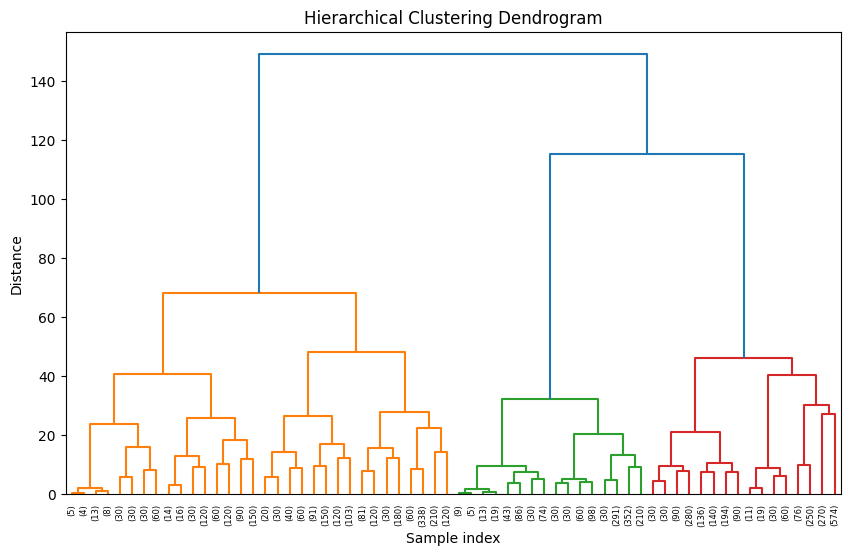

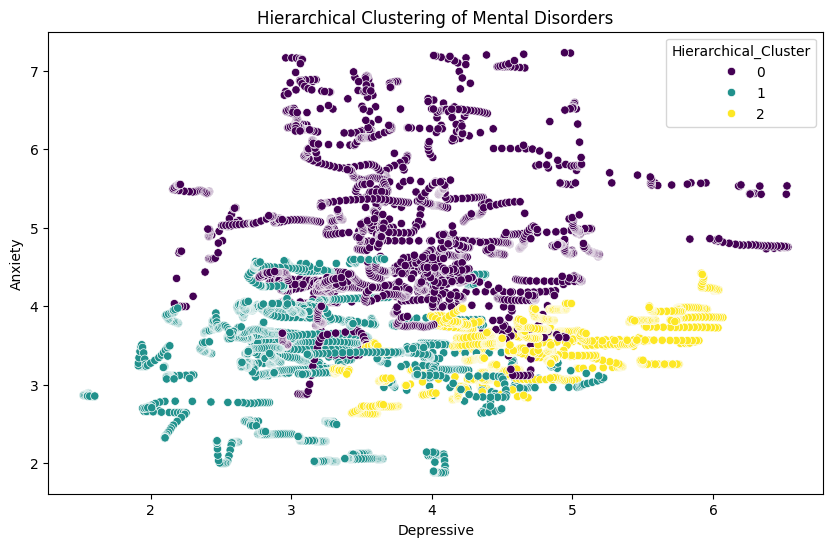

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Apply Hierarchical clustering
linked = linkage(df_scaled, method='ward')
hierarchical_labels = AgglomerativeClustering(n_clusters=3).fit_predict(df_scaled)

# Add cluster labels to the DataFrame
df['Hierarchical_Cluster'] = hierarchical_labels

# Visualize the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Depressive', y='Anxiety', hue='Hierarchical_Cluster', data=df, palette='viridis')
plt.title('Hierarchical Clustering of Mental Disorders')
plt.show()


# DBSCAN Clustering
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) clusters points that are closely packed together and marks points in low-density regions as outliers.

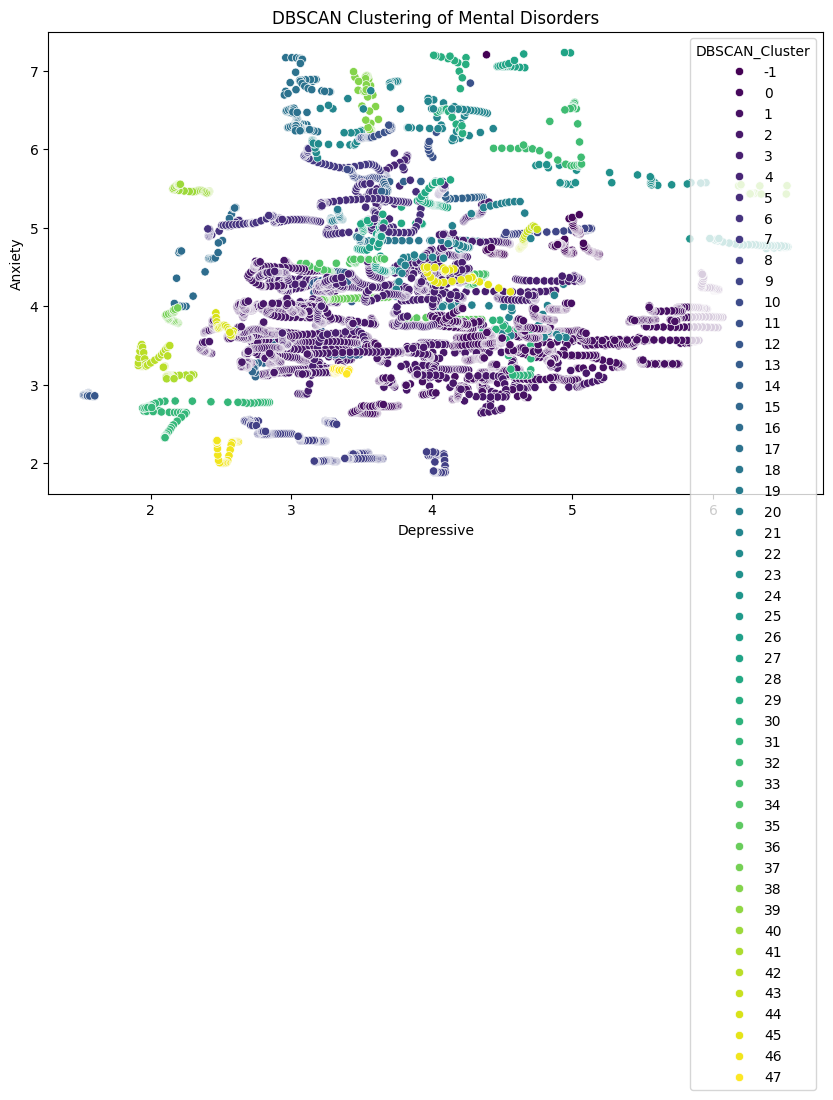

In [6]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Add cluster labels to the DataFrame
df['DBSCAN_Cluster'] = dbscan_labels

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Depressive', y='Anxiety', hue='DBSCAN_Cluster', data=df, palette='viridis', legend='full')
plt.title('DBSCAN Clustering of Mental Disorders')
plt.show()


# SOME other Clustering Techniques

Certainly! Principal Component Analysis (PCA) and Self-Organizing Maps (SOM) are excellent techniques for dimensionality reduction and clustering, respectively, that can provide meaningful insights. Let's apply these techniques to our mental health dataset.

## Principal Component Analysis (PCA)
PCA can reduce the dimensionality of the data while retaining most of the variance. This can help in visualizing the data in 2D or 3D, making clustering more interpretable.

## Self-Organizing Maps (SOM)
SOM is a type of artificial neural network that is trained using unsupervised learning to produce a low-dimensional representation of the data. It's particularly useful for visualizing high-dimensional data.

Let's implement PCA and SOM for the given dataset.

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_27040\2755331829.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['KMeans_Cluster'] = kmeans_labels


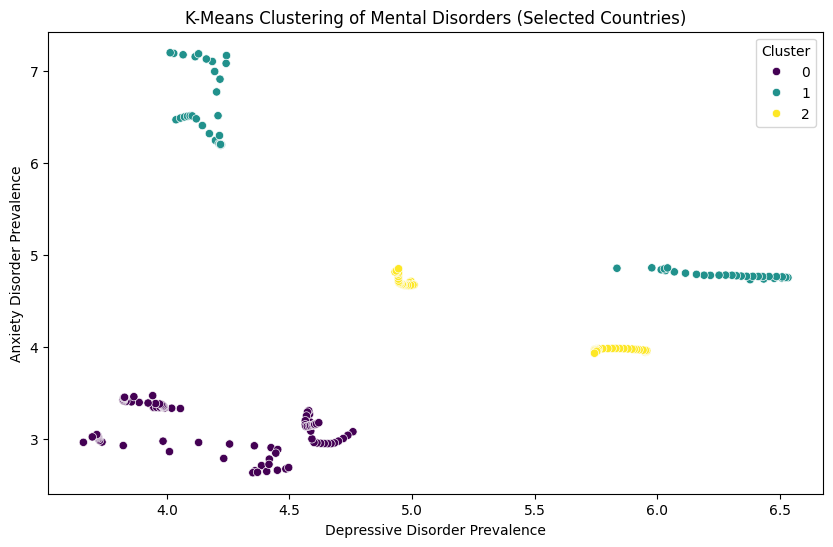

C:\Users\HP\AppData\Local\Temp\ipykernel_27040\2755331829.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Hierarchical_Cluster'] = hierarchical_labels


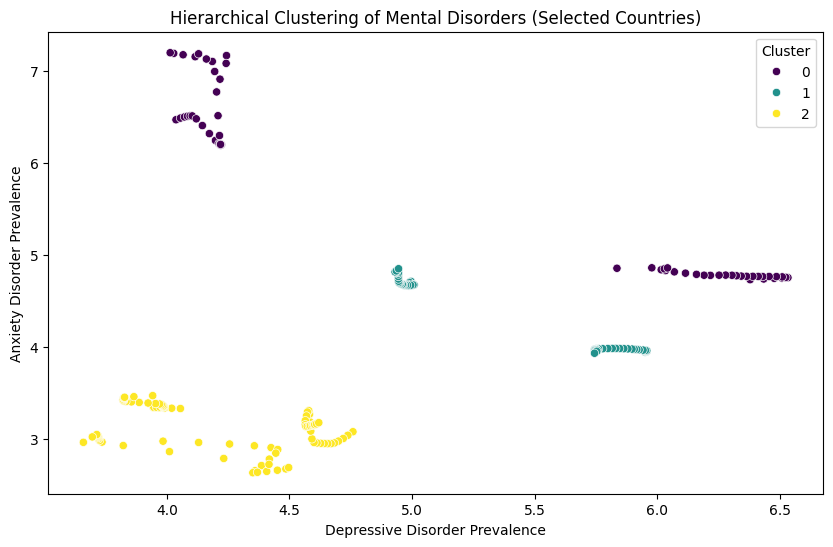

C:\Users\HP\AppData\Local\Temp\ipykernel_27040\2755331829.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['DBSCAN_Cluster'] = dbscan_labels


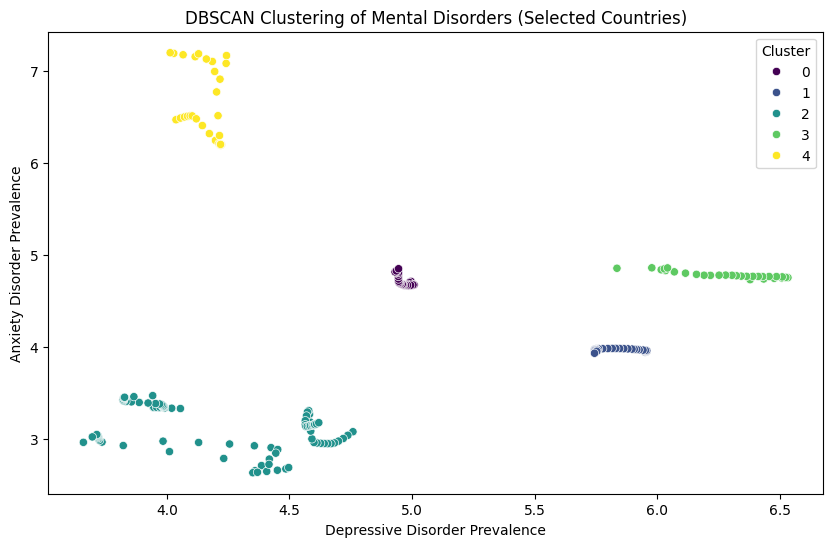

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of countries
countries = ['United States', 'Pakistan', 'India', 'Afghanistan', 'Greenland', "Angola", "Bangladesh", "Srilanka", "Ireland"]
df_subset = df[df['Entity'].isin(countries)]

# Select key features
features = ['Schizophrenia', 'Depressive', 'Anxiety']

# Normalize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_subset[features])

# Convert the normalized data back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=features)

# Add the 'Entity' column back to the scaled DataFrame for reference
df_scaled['Entity'] = df_subset['Entity'].values

# Function to visualize clusters
def plot_clusters(labels, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Depressive', y='Anxiety', hue=labels, data=df_subset, palette='viridis', legend='full')
    plt.title(title)
    plt.xlabel('Depressive Disorder Prevalence')
    plt.ylabel('Anxiety Disorder Prevalence')
    plt.legend(title='Cluster')
    plt.show()

# Apply K-Means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled[features])

# Add cluster labels to the DataFrame
df_subset['KMeans_Cluster'] = kmeans_labels

# Visualize K-Means clusters
plot_clusters(df_subset['KMeans_Cluster'], 'K-Means Clustering of Mental Disorders (Selected Countries)')

# Apply Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

linked = linkage(df_scaled[features], method='ward')
hierarchical_labels = AgglomerativeClustering(n_clusters=3).fit_predict(df_scaled[features])

# Add cluster labels to the DataFrame
df_subset['Hierarchical_Cluster'] = hierarchical_labels

# Visualize Hierarchical clusters
plot_clusters(df_subset['Hierarchical_Cluster'], 'Hierarchical Clustering of Mental Disorders (Selected Countries)')

# Apply DBSCAN Clustering
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled[features])

# Add cluster labels to the DataFrame
df_subset['DBSCAN_Cluster'] = dbscan_labels

# Visualize DBSCAN clusters
plot_clusters(df_subset['DBSCAN_Cluster'], 'DBSCAN Clustering of Mental Disorders (Selected Countries)')


# Principal Component Analysis (PCA)

C:\Users\HP\AppData\Local\Temp\ipykernel_27040\2875995381.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['PCA1'] = pca_result[:, 0]
C:\Users\HP\AppData\Local\Temp\ipykernel_27040\2875995381.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['PCA2'] = pca_result[:, 1]


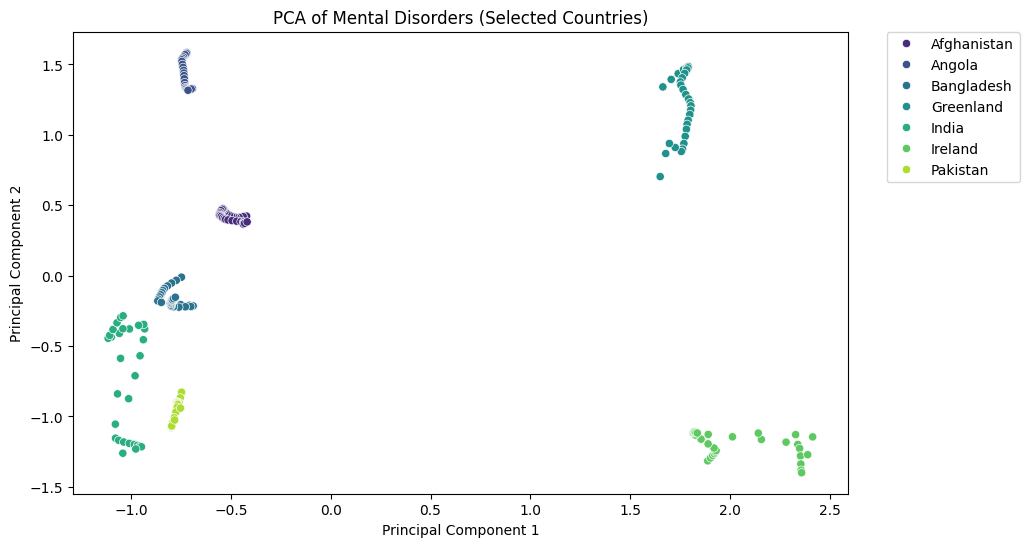

In [12]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled[features])

# Add the PCA results to the DataFrame
df_subset['PCA1'] = pca_result[:, 0]
df_subset['PCA2'] = pca_result[:, 1]

# Visualize PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Entity', data=df_subset, palette='viridis')
plt.title('PCA of Mental Disorders (Selected Countries)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


# Self-Organizing Maps (SOM)

C:\Users\HP\AppData\Local\Temp\ipykernel_27040\4272708035.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['SOM_Cluster'] = som_labels


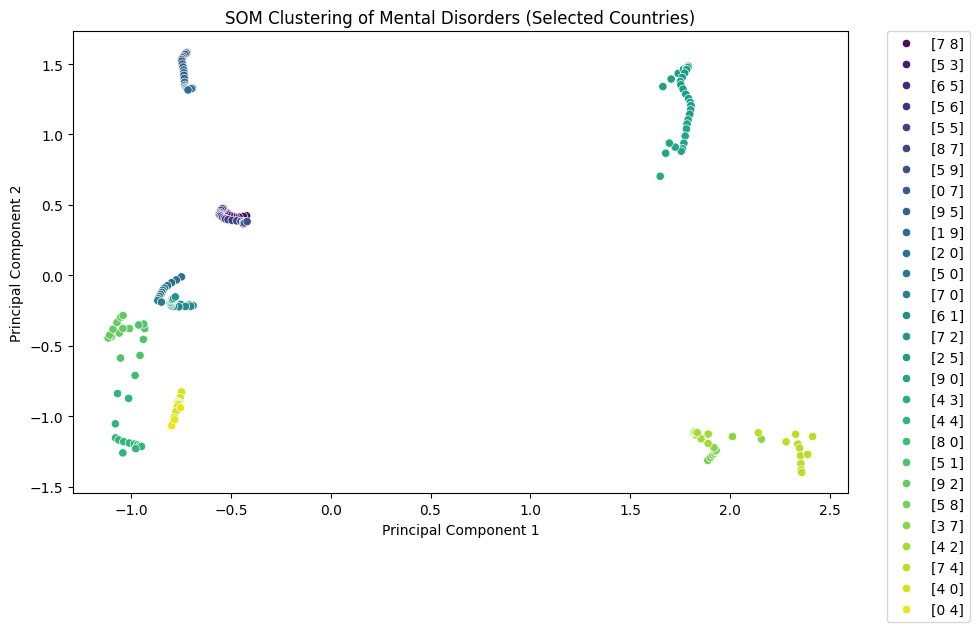

In [18]:
from minisom import MiniSom
import numpy as np

# Initialize and train SOM
som = MiniSom(x=10, y=10, input_len=3, sigma=1.0, learning_rate=0.5)
som.random_weights_init(df_scaled[features].values)
som.train_random(df_scaled[features].values, num_iteration=100)

# Function to plot the SOM
def plot_som(som, data):
    plt.figure(figsize=(10, 10))
    for i, (coords, points) in enumerate(som.win_map(data).items()):
        plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i}')
    plt.title('Self-Organizing Map (SOM) of Mental Disorders')
    plt.legend()
    plt.show()

# Map each data point to its winning node
win_map = som.win_map(df_scaled[features].values)
som_labels = np.array([som.winner(x) for x in df_scaled[features].values])

# Convert SOM labels to a categorical variable
som_labels = [str(label) for label in som_labels]
df_subset['SOM_Cluster'] = som_labels

# Visualize SOM clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='SOM_Cluster', data=df_subset, palette='viridis')
plt.title('SOM Clustering of Mental Disorders (Selected Countries)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


# Interpretation of Results
PCA:

The scatter plot of PCA results allows us to visualize how countries are distributed in a reduced-dimensional space.
Countries that are close together in the PCA plot have similar mental health profiles.

SOM:            
                                            
SOM clusters are visualized on a 2D grid. Each point represents a data point (country-year combination), and points that are close together have similar mental health profiles.
The SOM clustering overlay on the PCA plot shows which countries are grouped together by SOM, giving another perspective on the clustering results.


These techniques provide more interpretable and meaningful insights into the clustering of mental health data across countries, helping to identify patterns and similarities that might not be apparent with traditional clustering methods.